# Анализ данных для приложения Procrastinate Pro+

__Данные__:

- `visits_info_short.csv` — лог сервера с информацией о посещениях сайта 
- `orders_info_short.csv` — информация о заказах
- `costs_info_short.csv` — информация о расходах на рекламу

__Описание данных__:

Структура visits_info_short.csv:
 - `User Id` — уникальный идентификатор пользователя,
 - `Region` — страна пользователя,
 - `Device` — тип устройства пользователя,
 - `Channel` — идентификатор источника перехода,
 - `Session Start` — дата и время начала сессии,
 - `Session End` — дата и время окончания сессии.

Структура orders_info_short.csv:
 - `User Id` — уникальный идентификатор пользователя,
 - `Event Dt` — дата и время покупки,
 - `Revenue` — сумма заказа.

Структура costs_info_short.csv:
 - `dt` — дата проведения рекламной кампании,
 - `Channel` — идентификатор рекламного источника,
 - `costs` — расходы на эту кампанию.
 
__Цель исследования__: выявить причины убытков компании и сформулировать рекомендации для маркетингово отдела

__Задачи__:

1. Загрузить данные и подготовить их к анализу:
    - открыть файлы с данными
    - привести названия столбцов к единому стилю
    - обработать пропуски, если имеются
    - обработать дубликаты, если имеются
    - привести типы данных в соответствие к значениям в столбцах
2. Задать функции для расчёта и анализа LTV, ROI, удержания и конверсии, а так же для построения графиков
3. Провести исследовательский анализ данных:
    - составить профили пользователей 
    - определить минимальную и максимальную даты привлечения пользователей.
    - выяснить, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. 
    - построить таблицу, отражающую количество пользователей и долю платящих из каждой страны.
    - узнать, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. 
    - построить таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
    - изучить рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей.
    - построить таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.
4. Провести исследование расходов на маркетинг
    - посчитать общую сумму расходов на маркетинг
    - выяснить, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник
    - построить график с визуализацией динамики изменения расходов во времени по неделям по каждому источнику 
    - на другом графике визуализируйте динамику изменения расходов во времени по месяцам по каждому источнику.
    - узнать, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника, используя профили пользователей.
5. Оценить окупаемость рекламы
Исходя из вводной, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения:

 - проанализировать окупаемость рекламы c помощью графиков LTV и ROI, а также графиков динамики LTV, CAC и ROI
 - проверить конверсию пользователей и динамику её изменения 
 - сделать то же с удержанием пользователей 
 - построить и изучить графики конверсии и удержания
 - проанализировать окупаемость рекламы с разбивкой по устройствам, построить графики LTV и ROI, а также графики динамики LTV, CAC и ROI
 - проанализировать окупаемость рекламы с разбивкой по странам, построить графики LTV и ROI, а также графики динамики LTV, CAC и ROI
 - проанализировать окупаемость рекламы с разбивкой по рекламным каналам, построить графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
 - дать ответы на вопросы:
    - окупается ли реклама, направленная на привлечение пользователей в целом?
    - какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - чем могут быть вызваны проблемы окупаемости?
6. Написать выводы
    - выделить причины неэффективности привлечения пользователей
    - сформулировать рекомендации для отдела маркетинга

### Загрузка данных и их подготовка к анализу

Загрузите данные о визитах, заказах и рекламных расходах из CSV-файлов в переменные.

**Пути к файлам**

- визиты: `/datasets/visits_info_short.csv`;
- заказы: `/datasets/orders_info_short.csv`;
- расходы: `/datasets/costs_info_short.csv`.

Изучите данные и выполните предобработку. Есть ли в данных пропуски и дубликаты? Убедитесь, что типы данных во всех колонках соответствуют сохранённым в них значениям. Обратите внимание на столбцы с датой и временем.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

In [3]:
try:
    visits = pd.read_csv('visits_info_short.csv')
    orders = pd.read_csv('orders_info_short.csv')
    costs = pd.read_csv('costs_info_short.csv')
except:
    visits = pd.read_csv('https://code.s3.yandex.net/datasets/visits_info_short.csv')
    orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders_info_short.csv')
    costs = pd.read_csv('https://code.s3.yandex.net/datasets/costs_info_short.csv')


In [4]:
display(visits.shape)
visits.sample(5, random_state=123)

(309901, 6)

,User Id,Region,Device,Channel,Session Start,Session End
105275,878405525766,United States,iPhone,YRabbit,2019-08-11 21:09:30,2019-08-11 22:03:12
20457,349325122087,United States,Android,YRabbit,2019-05-22 23:13:43,2019-05-22 23:20:41
36445,701570557833,United States,iPhone,YRabbit,2019-06-07 07:34:00,2019-06-07 08:46:30
253429,929053333087,France,PC,organic,2019-08-01 12:39:18,2019-08-01 12:51:58
144298,233184862337,United States,iPhone,FaceBoom,2019-09-14 01:19:53,2019-09-14 02:08:13


In [5]:
display(orders.shape)
orders.sample(5, random_state=123)

(40212, 3)

,User Id,Event Dt,Revenue
10937,348499411450,2019-08-05 09:00:00,4.99
25546,123994392572,2019-10-20 02:54:08,4.99
12978,238855758491,2019-08-17 17:27:48,5.99
10384,116654369785,2019-08-01 13:24:49,4.99
39689,629509302087,2019-10-26 11:01:22,4.99


In [6]:
display(costs.shape)
costs.sample(5, random_state=123)

(1800, 3)

,dt,Channel,costs
708,2019-10-16,TipTop,353.50
1323,2019-07-03,OppleCreativeMedia,12.50
270,2019-07-30,MediaTornado,3.84
756,2019-06-06,YRabbit,4.20
1566,2019-09-04,WahooNetBanner,20.40


Файлы открыты, преобразованы в датафреймы.
Приводим названия столбцов к единому стилю.

In [7]:
visits.columns = visits.columns.str.replace(' ', '_').str.lower()
orders.columns = orders.columns.str.replace(' ', '_').str.lower()
costs.columns = costs.columns.str.lower()

In [8]:
for df in visits, orders, costs:
    df.info()
    print()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   user_id        309901 non-null  int64 
 1   region         309901 non-null  object
 2   device         309901 non-null  object
 3   channel        309901 non-null  object
 4   session_start  309901 non-null  object
 5   session_end    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   40212 non-null  int64  
 1   event_dt  40212 non-null  object 
 2   revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column 

Названия приведены к общему стилю.
Как видно из кратких описаний датафреймов, пропусков не обнаружено.
Можно сразу привести данные к необходимым типам, а именно - преобразовать столбцы с датами из object в datetime

In [9]:
for c in ['session_start', 'session_end']: 
    visits[c] = pd.to_datetime(visits[c])

orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

for df in visits, orders, costs:
    df.info()
    print()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942

In [33]:
visits.duplicated().sum()

0

In [34]:
orders.duplicated().sum()

0

In [35]:
costs.duplicated().sum()

0

Полных дубликатов в данных нет.

### Функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

Функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

#### Функция get_profiles

In [36]:
def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].values.astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

#### Функция get_retention

In [37]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

#### Функция get_conversion

In [38]:
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

#### Функция get_ltv

In [39]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

#### Функция filter_data

In [40]:
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

#### Функция plot_retention

In [41]:
def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

#### Функция plot_conversion

In [42]:
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

#### Функция plot_ltv_roi

In [43]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

### Исследовательский анализ данных

In [44]:
profiles = get_profiles(visits, orders, costs)
display(profiles.shape)
profiles.sample(5, random_state=123)

(150008, 9)

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
50315,333465412235,2019-09-23 07:04:01,WahooNetBanner,Android,UK,2019-09-23,2019-09-01,False,0.608696
76755,509414143771,2019-07-29 09:26:41,TipTop,iPhone,United States,2019-07-29,2019-07-01,False,2.641600
40967,271628998070,2019-07-26 03:21:32,organic,Mac,Germany,2019-07-26,2019-07-01,False,0.000000
73692,488948526623,2019-07-23 06:43:13,organic,iPhone,United States,2019-07-23,2019-07-01,False,0.000000
21107,140519878421,2019-05-23 01:09:11,organic,iPhone,United States,2019-05-23,2019-05-01,False,0.000000


In [45]:
display(profiles['dt'].min())
display(profiles['dt'].max())

datetime.date(2019, 5, 1)

datetime.date(2019, 10, 27)

Всего 150008 уникальных пользователей, минимальная дата привлечения 01.05.2019, максимальная - 27.10.2019

Создадим функцию для группировки и вычисления доли платящих пользователей

In [48]:
def get_payers_by(df, col_name):
    df = df.groupby(col_name).agg({'user_id' : 'count', 'payer' : 'sum'})
    df = df.rename(columns={'user_id' : 'all_users_count', 'payer' : 'payer_count'})
    df['payer_share_in_country'] = (df['payer_count'] / df['all_users_count'] * 100).round(2)
    df['payer_share_total'] = (df['payer_count'] / 150008 * 100).round(2)
    df = df.sort_values(by='payer_share_total', ascending=False)
    return df

In [49]:
user_countries = get_payers_by(profiles, 'region')
user_countries

,all_users_count,payer_count,payer_share_in_country,payer_share_total
region,,,,
United States,100002,6902,6.90,4.60
UK,17575,700,3.98,0.47
France,17450,663,3.80,0.44
Germany,14981,616,4.11,0.41


Наибольшее количество платящих пользователей из Соединенных Штатов (6902 пользователя, 6,9% от всех пользователей из этой страны, 4,9% от всех пользователей)

In [23]:
user_devices = get_payers_by(profiles, 'device')
user_devices

,all_users_count,payer_count,payer_share_in_country,payer_share_total
device,,,,
iPhone,54479,3382,6.21,2.25
Android,35032,2050,5.85,1.37
Mac,30042,1912,6.36,1.27
PC,30455,1537,5.05,1.02


Наибольшее количество платящих пользователей пользуется iPhone (3382 пользователя, 6,21% от всех пользователей из этой страны, 2,25% от всех пользователей)

In [24]:
user_channels = get_payers_by(profiles, 'channel')
user_channels

,all_users_count,payer_count,payer_share_in_country,payer_share_total
channel,,,,
FaceBoom,29144,3557,12.20,2.37
TipTop,19561,1878,9.60,1.25
organic,56439,1160,2.06,0.77
WahooNetBanner,8553,453,5.30,0.30
AdNonSense,3880,440,11.34,0.29
RocketSuperAds,4448,352,7.91,0.23
LeapBob,8553,262,3.06,0.17
OppleCreativeMedia,8605,233,2.71,0.16
lambdaMediaAds,2149,225,10.47,0.15


Наибольшее количество платящих пользователей привлечено при помощи канала FaceBoom (3557 пользователя, 12,20% от всех пользователей из этой страны, 2,37% от всех пользователей)

#### Выводы

- Всего 150008 уникальных пользователей, минимальная дата привлечения 01.05.2019, максимальная - 27.10.2019
- Наибольшее количество платящих пользователей из Соединенных Штатов (6902 пользователя, 6,9% от всех пользователей из этой страны, 4,9% от всех пользователей)
- Наибольшее количество платящих пользователей пользуется iPhone (3382 пользователя, 6,21% от всех пользователей из этой страны, 2,25% от всех пользователей)
- Наибольшее количество платящих пользователей привлечено при помощи канала FaceBoom (3557 пользователя, 12,20% от всех пользователей из этой страны, 2,37% от всех пользователей)

### Маркетинг

In [50]:
total_expenses = costs['costs'].sum()
total_expenses.round(2)

105497.3

In [51]:
costs.groupby('channel').agg({'costs' : 'sum'}).sort_values(by='costs', ascending=False)

,costs
channel,
TipTop,54751.30
FaceBoom,32445.60
WahooNetBanner,5151.00
AdNonSense,3911.25
OppleCreativeMedia,2151.25
RocketSuperAds,1833.00
LeapBob,1797.60
lambdaMediaAds,1557.60
MediaTornado,954.48


In [52]:
costs['dt'] = pd.to_datetime(costs['dt'])
costs['week'] = costs['dt'].dt.isocalendar().week
costs['month'] = costs['dt'].dt.month
costs.head()

,dt,channel,costs,week,month
0,2019-05-01,FaceBoom,113.3,18,5
1,2019-05-02,FaceBoom,78.1,18,5
2,2019-05-03,FaceBoom,85.8,18,5
3,2019-05-04,FaceBoom,136.4,18,5
4,2019-05-05,FaceBoom,122.1,18,5


In [53]:
costs_by_week = costs.pivot_table(index='week', 
                                    columns='channel', 
                                    values='costs', 
                                    aggfunc='sum')
costs_by_week.head()

channel,AdNonSense,FaceBoom,LeapBob,MediaTornado,OppleCreativeMedia,RocketSuperAds,TipTop,WahooNetBanner,YRabbit,lambdaMediaAds
week,,,,,,,,,,
18,211.05,535.7,16.80,38.64,24.00,99.450,347.0,49.2,52.2,81.6
19,273.00,750.2,31.71,61.68,34.50,139.230,470.0,92.4,75.9,103.2
20,265.65,755.7,26.67,59.04,27.50,138.060,454.0,90.0,69.3,90.4
21,266.70,722.7,26.67,50.16,34.25,131.040,801.8,79.2,65.4,119.2
22,202.65,1208.9,65.52,36.96,81.75,97.695,1421.2,179.4,49.8,83.2


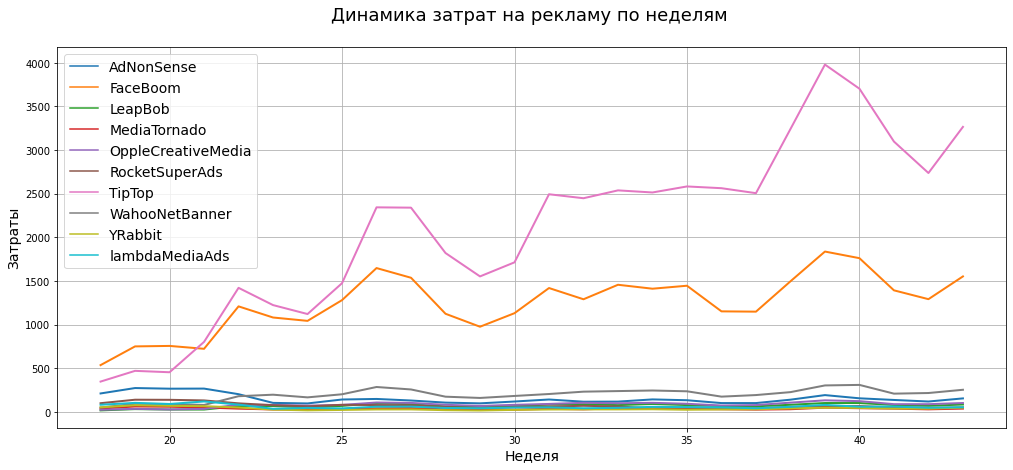

In [54]:
plt.figure(figsize=(17, 7))
sns.lineplot(data=costs_by_week, linewidth=2, dashes=False)
plt.title('Динамика затрат на рекламу по неделям \n', fontsize=18)
plt.legend(loc='upper left', fontsize=14)
plt.xlabel('Неделя', fontsize=14)
plt.ylabel('Затраты', fontsize=14)
plt.grid(visible=True)
plt.show()

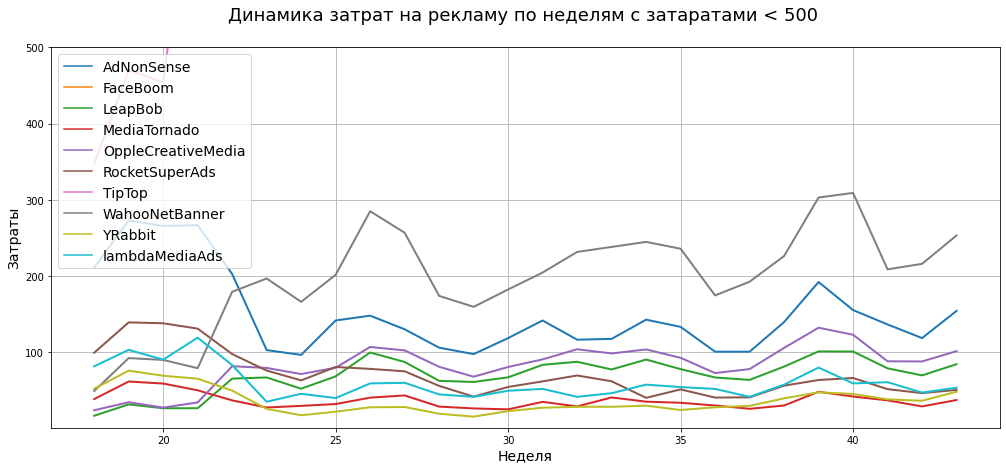

In [61]:
plt.figure(figsize=(17, 7))
sns.lineplot(data=costs_by_week, linewidth=2, dashes=False)
plt.ylim(1, 500)
plt.title('Динамика затрат на рекламу по неделям с затаратами < 500 \n', fontsize=18)
plt.legend(loc='upper left', fontsize=14)
plt.xlabel('Неделя', fontsize=14)
plt.ylabel('Затраты', fontsize=14)
plt.grid(visible=True)
plt.show()

In [63]:
costs_by_month = costs.pivot_table(index='month', 
                                    columns='channel', 
                                    values='costs', 
                                    aggfunc='sum')
costs_by_month.head()

channel,AdNonSense,FaceBoom,LeapBob,MediaTornado,OppleCreativeMedia,RocketSuperAds,TipTop,WahooNetBanner,YRabbit,lambdaMediaAds
month,,,,,,,,,,
5,1169.70,3524.4,140.28,238.56,169.75,577.980,2981.0,418.8,299.70,458.4
6,538.65,5501.1,314.58,138.00,370.00,325.715,6675.6,921.0,106.20,199.2
7,504.00,5294.3,313.53,138.48,366.50,252.070,8410.2,851.4,97.38,219.2
8,579.60,6274.4,369.81,154.56,439.25,253.110,11202.0,1040.4,124.74,220.0
9,581.70,6114.9,343.98,144.72,427.75,218.400,13232.5,977.4,152.79,247.2


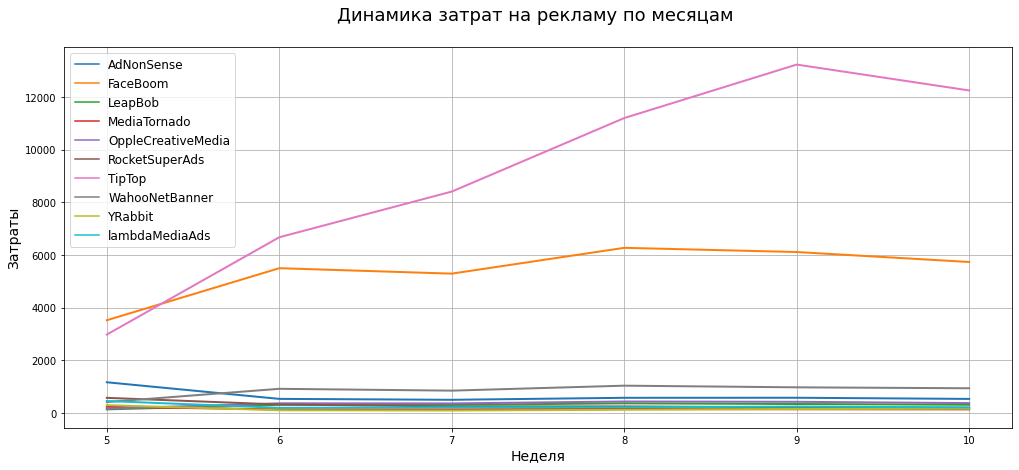

In [64]:
plt.figure(figsize=(17, 7))
sns.lineplot(data=costs_by_month, linewidth=2, dashes=False)
plt.title('Динамика затрат на рекламу по месяцам \n', fontsize=18)
plt.legend(loc='upper left', fontsize=12)
plt.xlabel('Неделя', fontsize=14)
plt.ylabel('Затраты', fontsize=14)
plt.grid(visible=True)
plt.show()

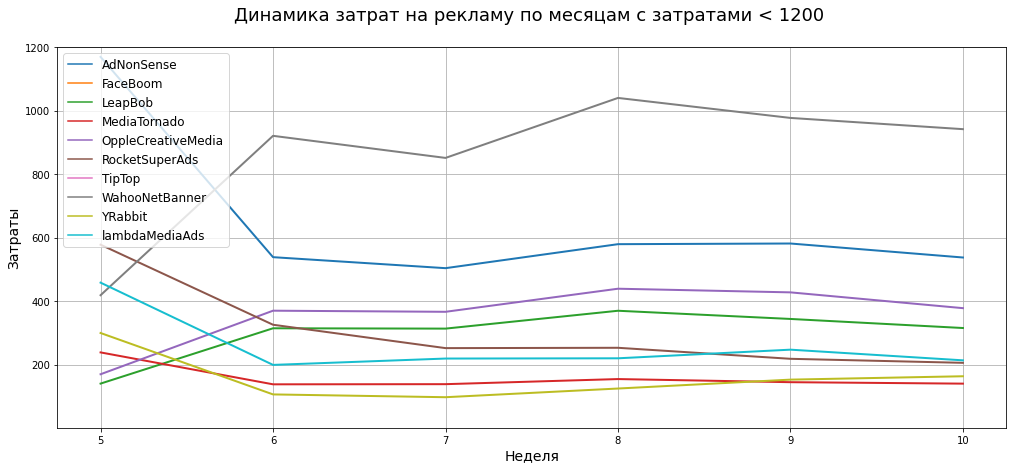

In [67]:
plt.figure(figsize=(17, 7))
sns.lineplot(data=costs_by_month, linewidth=2, dashes=False)
plt.title('Динамика затрат на рекламу по месяцам c затратами < 1200 \n', fontsize=18)
plt.legend(loc='upper left', fontsize=12)
plt.xlabel('Неделя', fontsize=14)
plt.ylabel('Затраты', fontsize=14)
plt.ylim(1, 1200)
plt.grid(visible=True)
plt.show()

In [68]:
cac_mean = profiles.pivot_table(index='dt', columns='channel', values='acquisition_cost', aggfunc='mean')
cac_mean.head()

channel,AdNonSense,FaceBoom,LeapBob,MediaTornado,OppleCreativeMedia,RocketSuperAds,TipTop,WahooNetBanner,YRabbit,lambdaMediaAds,organic
dt,,,,,,,,,,,
2019-05-01,1.050000,1.089423,0.21000,0.240000,0.236111,0.540000,0.975610,0.568421,0.289286,0.765217,0.0
2019-05-02,0.962500,1.084722,0.18375,0.229091,0.265625,0.565500,1.000000,0.514286,0.253846,0.730435,0.0
2019-05-03,1.050000,1.128947,0.21000,0.232000,0.239583,0.528387,1.049180,0.600000,0.310345,0.730435,0.0
2019-05-04,1.008824,1.108943,0.19950,0.212727,0.250000,0.531818,0.972222,0.540000,0.294340,0.733333,0.0
2019-05-05,1.020833,1.080531,0.20087,0.230000,0.250000,0.561122,1.012987,0.600000,0.290909,0.752941,0.0


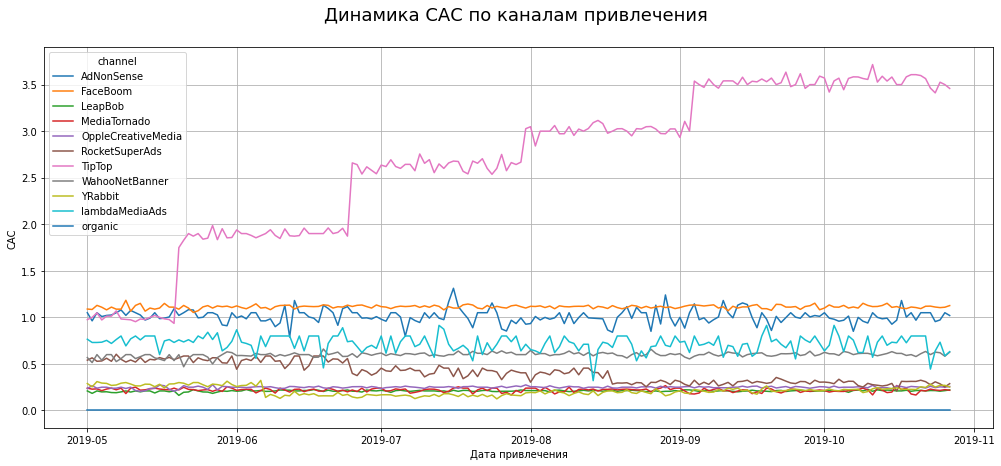

In [69]:
cac_mean.plot(grid=True, figsize=(17, 7))
plt.ylabel('CAC')
plt.xlabel('Дата привлечения')
plt.title('Динамика САС по каналам привлечения \n', fontsize=18)
plt.show()

#### Выводы

- общие затраты на рекламу: 105497.3
- больше всего затрат на каналы: TipTop (54751.30), FaceBoom (32445.60)
- затраты на канал привлечения TipTop росли быстрее, чем затраты на FaceBoom
- средняя стоимость привлечения росла значительно из канала TipTop выросла значительно по данным за имеющийся период (от 1 до ~3.5), при этом стоимость привлечения из канала FaceBoom менялась незначительно.

### Окупаемость рекламы

In [70]:
observation_date = datetime(2019, 10, 27).date() #максимальная дата в данных - 27 октбяря 2019 года
horizon_days = 14

In [87]:
profiles = profiles.query('channel != "organic"') #исключаем органический трафик привлечения

#### Общие графики LTV и ROI, а также графики динамики LTV, CAC и ROI

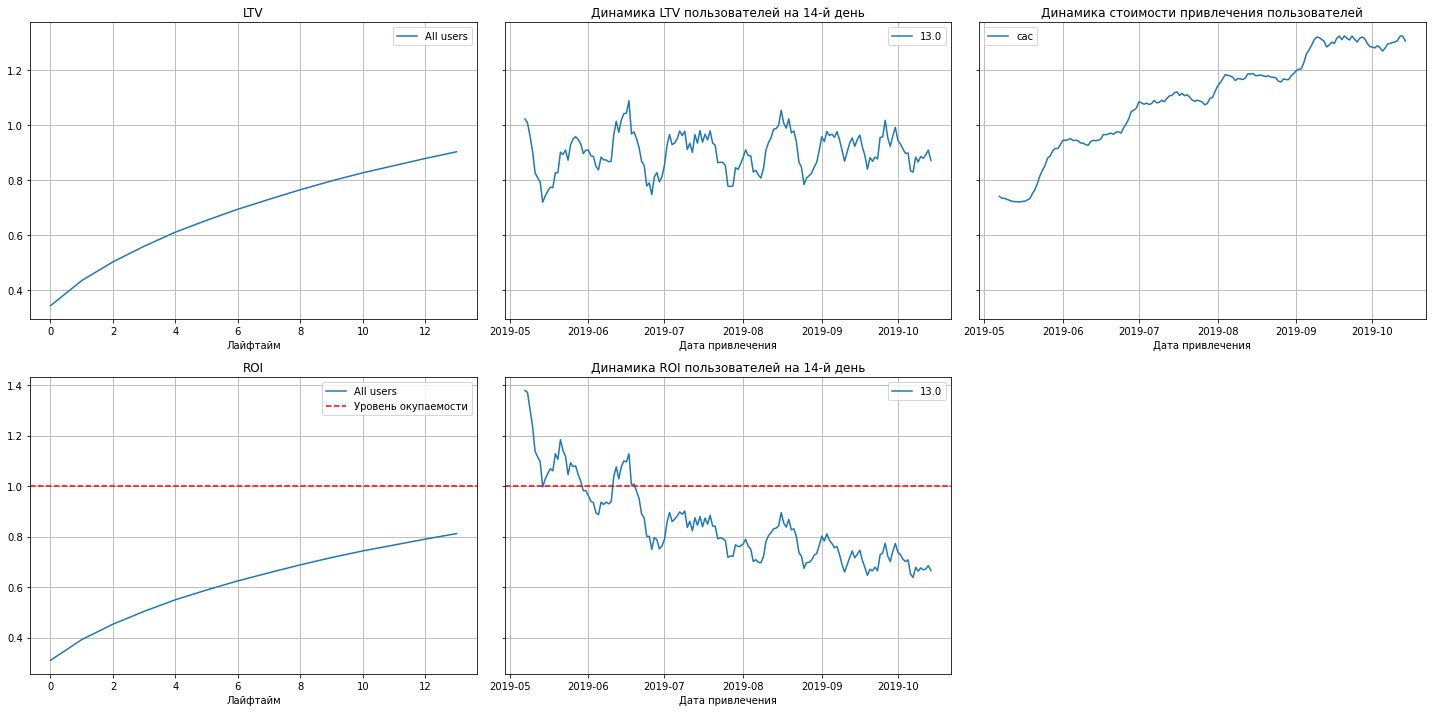

In [74]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(profiles,
                                                                      orders,
                                                                      observation_date,
                                                                      horizon_days)
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

На графиках LTV и ROI, а также графиках динамики LTV, CAC и ROI видим:
- реклама за наблюдаемый период времени не окупилась
- САС увеличивается, что вероятно говорит об увеличении рекламного бюджета со временем
- В пользу этой идеи, говорит так же и динамика ROI

#### Общие графики конверсии пользователей и динамики её изменения

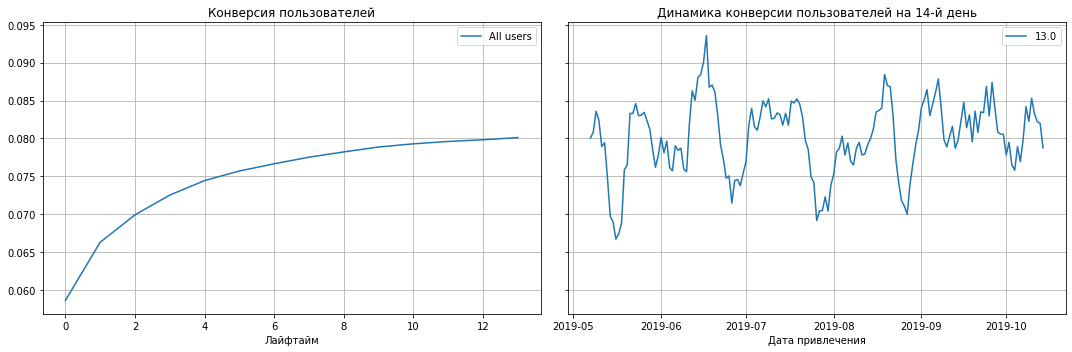

In [88]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Судя по графикам, в целом пользователи неплохо конвертируются, динамика имеет колебания, но в общем стабильна.

#### Общие графики удержания пользователей

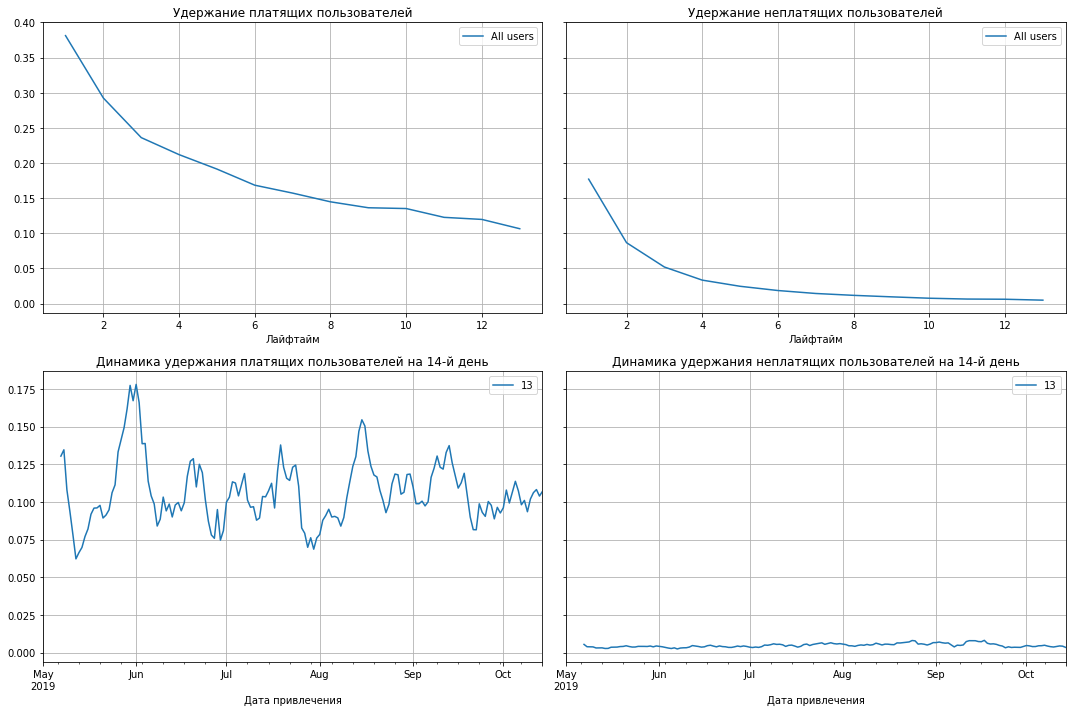

In [76]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days
)

plot_retention(retention_grouped, retention_history, horizon_days) 

На графике удержания платящих пользователей заметна общая тенденция к снижению показателя, остальные выглядят стандартно - удержание платящих пользователей снижается медленнее, чем удержание неплатящих, динамика удержания неплатящих пользователей стабильно низкая. 

#### Графики LTV и ROI, а также графики динамики LTV, CAC и ROI с разбивкой по устройствам

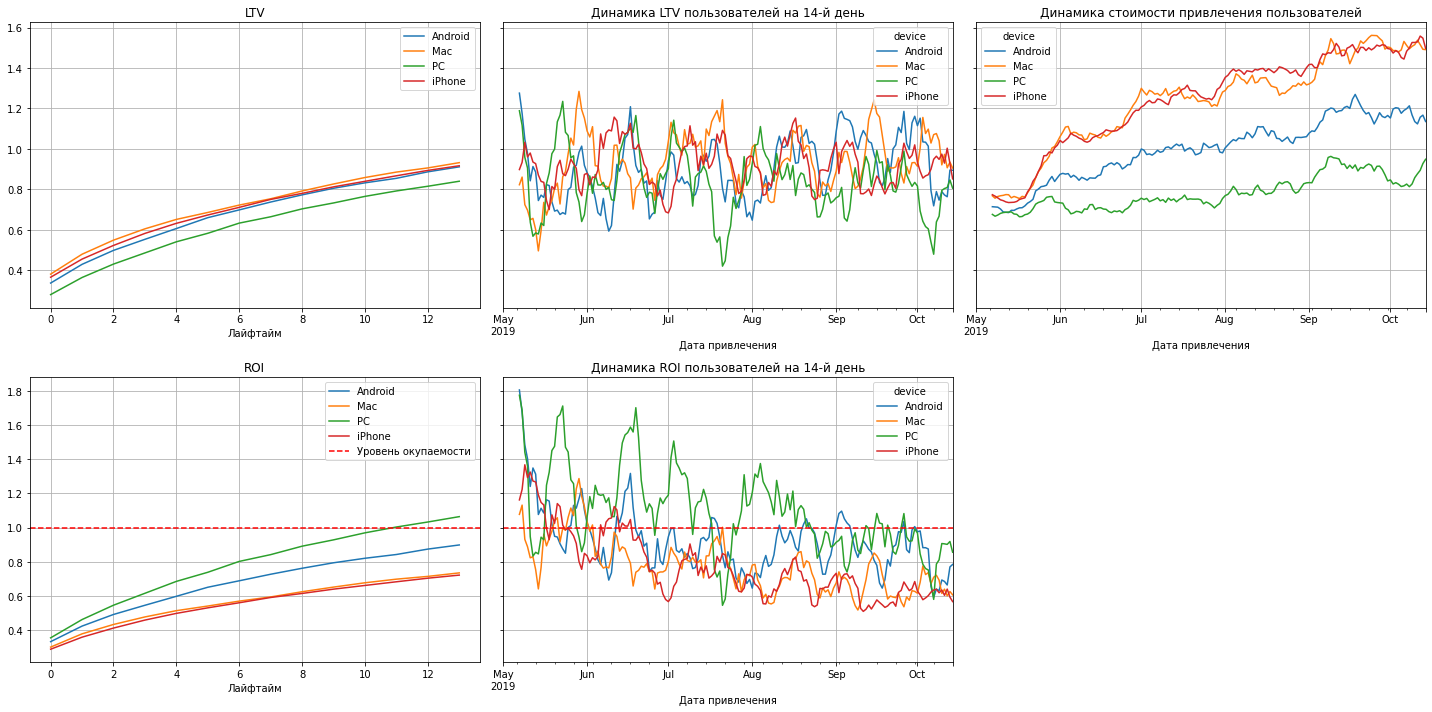

In [79]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(profiles,
                                                                      orders,
                                                                      observation_date,
                                                                      horizon_days,
                                                                      dimensions=['device'])
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

#### Графики конверсии пользователей и динамики её изменения с разбивкой по устройствам

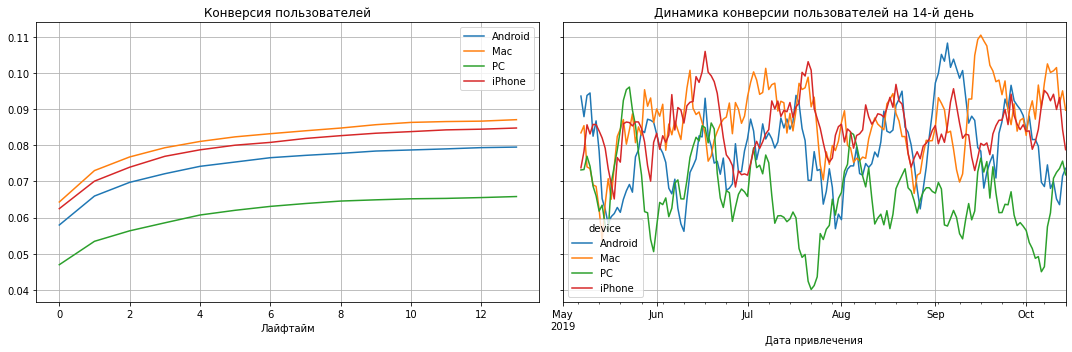

In [80]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=['device']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

#### Графики удержания пользователей с разбивкой по устройствам

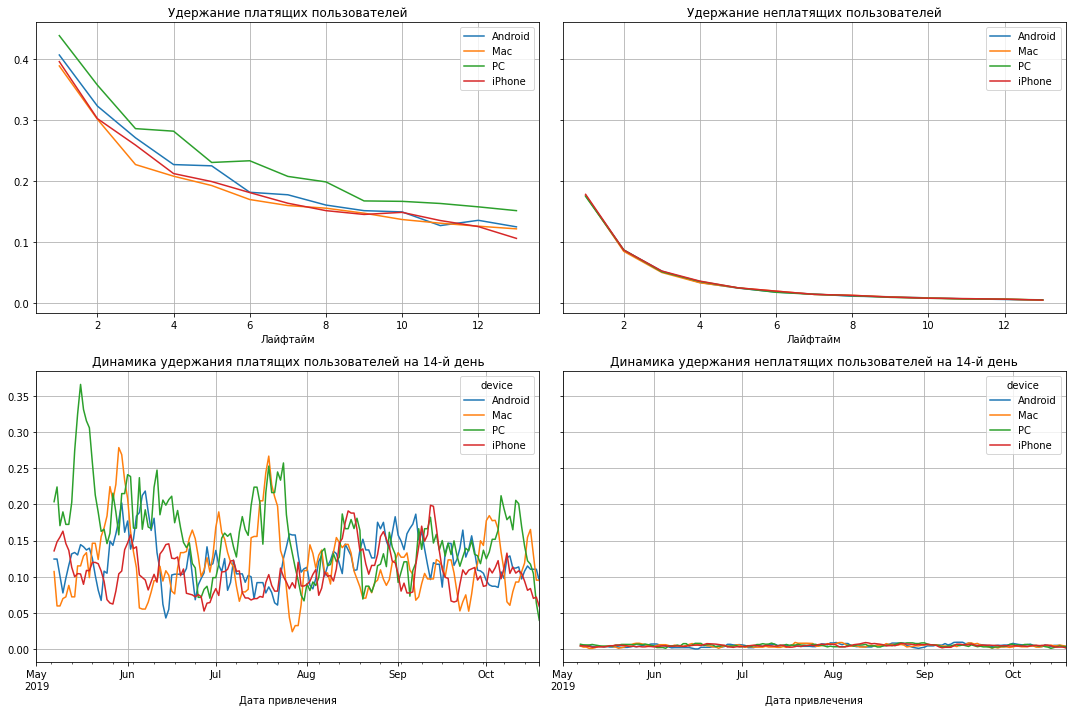

In [40]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=['device']
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Судя по всему, бюджет на рекламу для пользователей iPhone и MAC, не оправдывает себя, несмотря на лучшую, по сравнению с андроидом и ПК, конверсию. В то же время, удержание платящих пользователей ПК лучше чем у остальных девайсов. Так же, ПК единственный окупившийся канал, вероятно из-за самого небольшого бюджета на рекламу на этих устройствах.

#### Графики LTV и ROI, а также графики динамики LTV, CAC и ROI с разбивкой по регионам

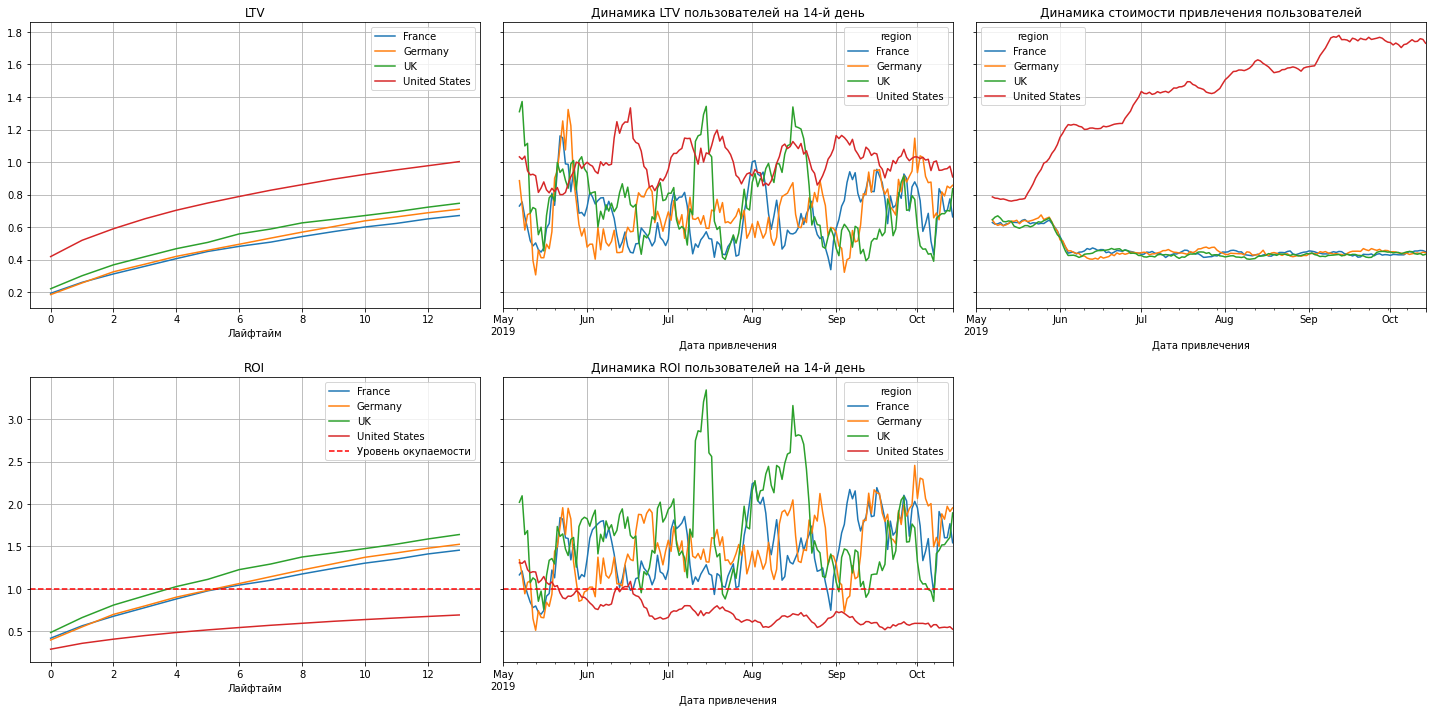

In [81]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(profiles,
                                                                      orders,
                                                                      observation_date,
                                                                      horizon_days,
                                                                      dimensions=['region'])
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

#### Графики конверсии пользователей и динамики её изменения с разбивкой по регионам

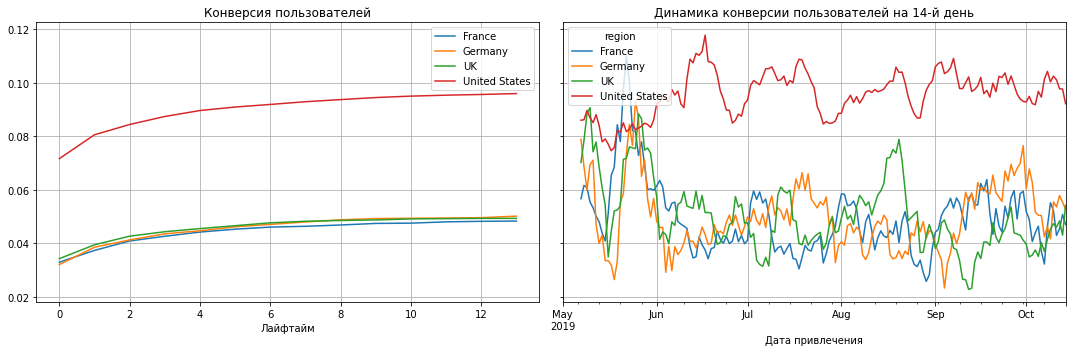

In [82]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=['region']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

#### Графики удержания пользователей с разбивкой по регионам

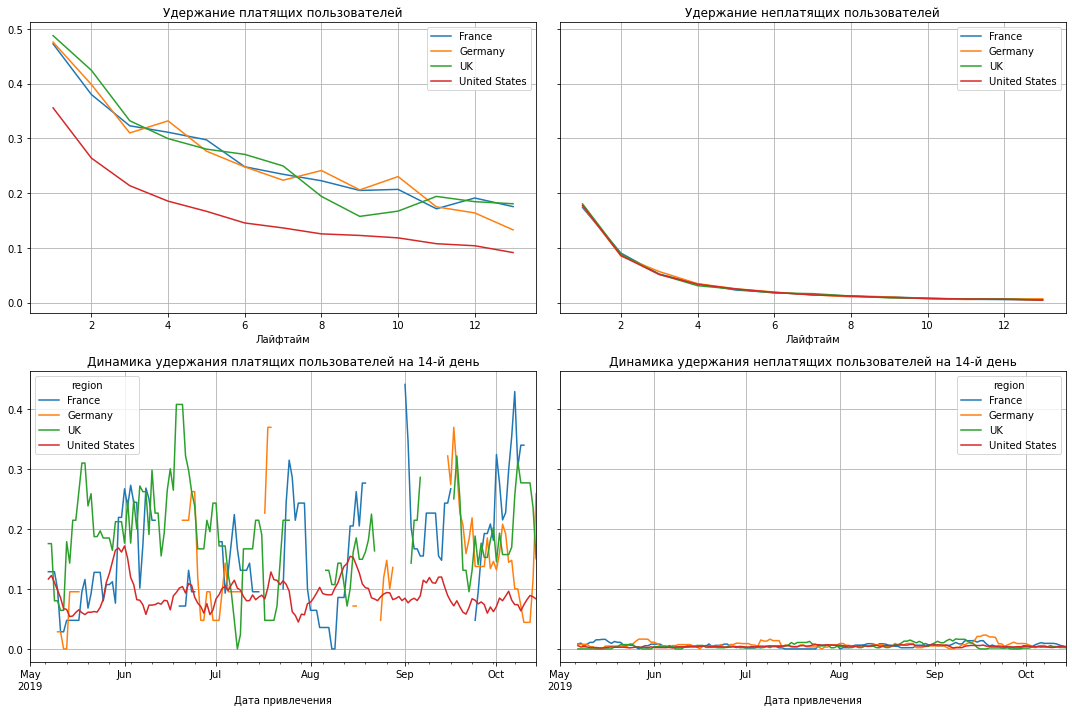

In [83]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=['region']
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Исходя из графиков видно, что бюджет на рекламу для поользователей США самый большой, конверсия больше, чем в других регионах, при этом ROI так и не достиг единицы, а удержание хуже, чем в других регионах. Вероятно, стоит оптимизировать траты для достижения лучшего показателя ROI

#### Графики LTV и ROI, а также графики динамики LTV, CAC и ROI с разбивкой по каналам

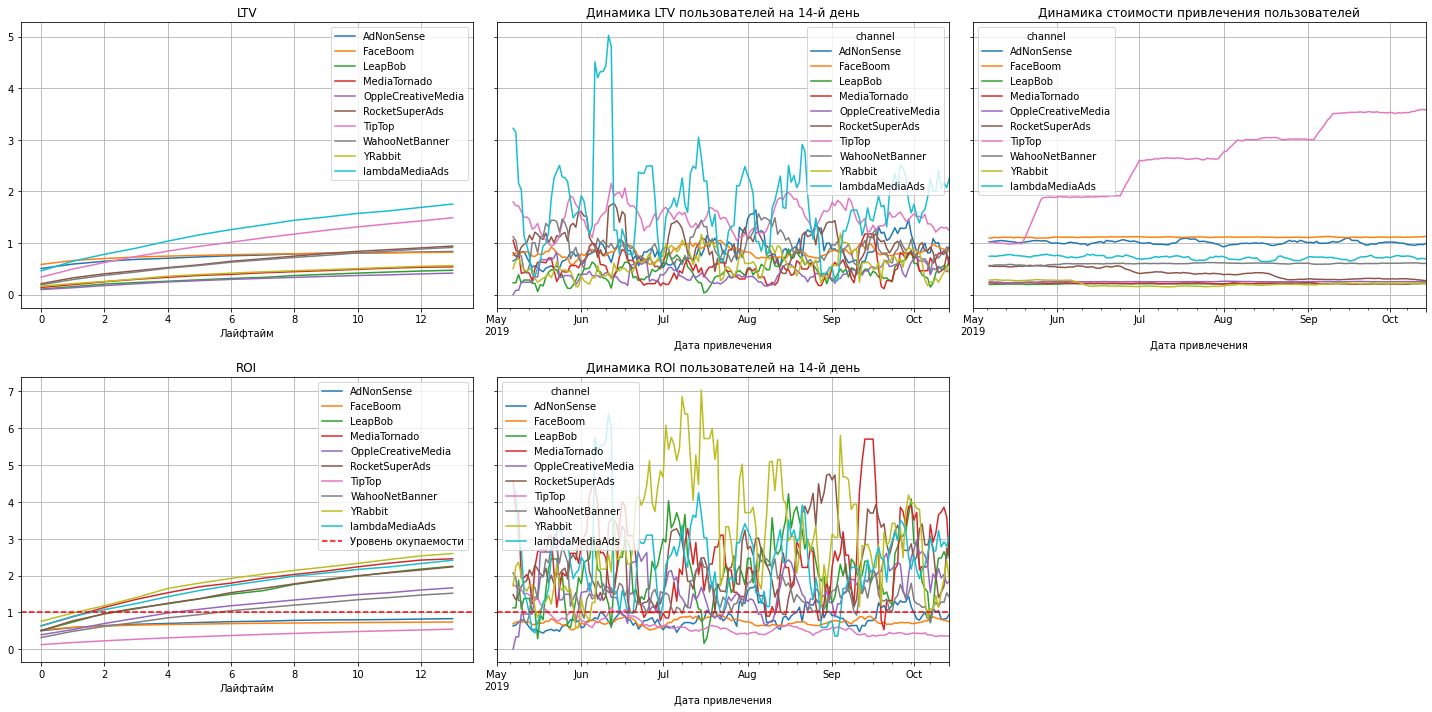

In [84]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(profiles,
                                                                      orders,
                                                                      observation_date,
                                                                      horizon_days,
                                                                      dimensions=['channel'])
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

#### Графики конверсии пользователей и динамики её изменения с разбивкой по каналам

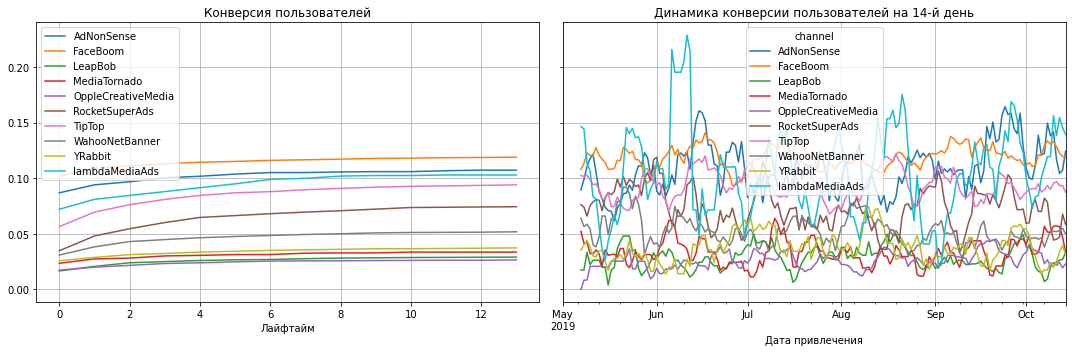

In [85]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=['channel']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

#### Графики удержания пользователей с разбивкой по каналам

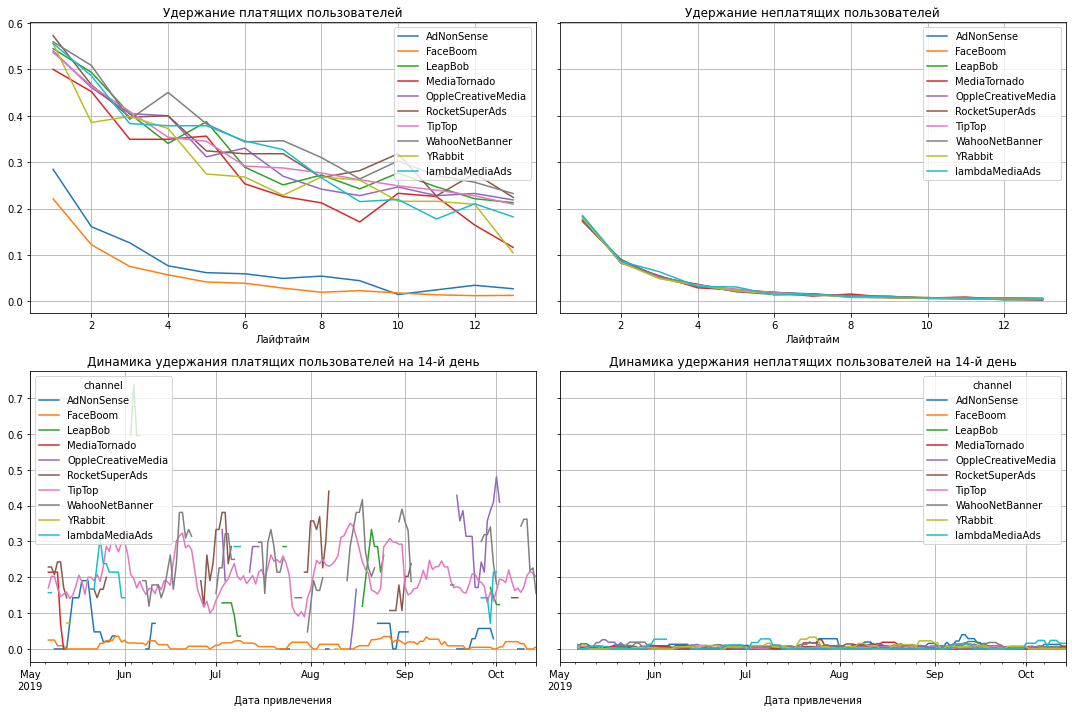

In [86]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=['channel']
)

plot_retention(retention_grouped, retention_history, horizon_days) 

На графиках можем наблюдать, что каналы AdNonSense, FaceBoom, TipTop не окупились, бюджет на канал TipTop постоянно рос. Удержание платящих пользователей на каналах AdNonSense, FaceBoom значительно ниже, чем на остальных. 

#### Ответы на вопросы 
1. __Окупается ли реклама, направленная на привлечение пользователей в целом?__ <br>
В целом, за две недели, реклама на привлечение пользователей окупиться не успела, что видно из общих графиков.
2. __Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?__ <br>
На окупаемость рекламы явно оказыавют влияние затрты на рекламу для пользователей iPhone и Mac, затраты на рекламу в США, и каналы AdNonSense, FaceBoom, TipTop
3. __Чем могут быть вызваны проблемы окупаемости?__ <br>
Судя по всему, проблемы окупаемости вызываны чрезмерным вложением средств на рекламу для для пользователей iPhone и Mac, для региона США и для канала TipTop, а так же низкое удержание платящих пользователей из США и привлекаемых через каналы AdNonSense, FaceBoom.

### Выводы

- всего 150008 уникальных пользователей, минимальная дата привлечения 01.05.2019, максимальная - 27.10.2019
- наибольшее количество платящих пользователей из Соединенных Штатов (6902 пользователя, 6,9% от всех пользователей из этой страны, 4,9% от всех пользователей)
- наибольшее количество платящих пользователей пользуется iPhone (3382 пользователя, 6,21% от всех пользователей из этой страны, 2,25% от всех пользователей)
- наибольшее количество платящих пользователей привлечено при помощи канала FaceBoom (3557 пользователя, 12,20% от всех пользователей из этой страны, 2,37% от всех пользователей)
- общие затраты на рекламу: 105497.3
- больше всего затрат на каналы: TipTop (54751.30), FaceBoom (32445.60)
- затраты на канал прилвечения TipTop росли быстрее, чем затраты на FaceBoom
- средняя стоимость привлечения росла значительно из канала TipTop выросла значительно по данным за имеющийся период (от 1 до ~3.5), при этом стоимость привлечения из канала FaceBoom менялась назначительно.
- На окупаемость рекламы явно оказыавют влияние затрты на рекламу для пользователей iPhone и Mac, затраты на рекламу в США, и каналы AdNonSense, FaceBoom, TipTop. Судя по всему, проблемы окупаемости вызываны чрезмерным вложением средств на рекламу для для пользователей iPhone и Mac, для региона США и для канала TipTop, а так же низкое удержание платящих пользователей из США и привлекаемых через каналы AdNonSense, FaceBoom.


#### Рекомендации

- возможно, стоит оптимизировать количество средств выделяемых на реклмау для gользователей iPhone и Mac для достижения лучешго ROI. Также провести дополнительное исследования для выяснение причин низкого удержания платящих пользоватлей.
- тоже самое стоит сделать с бюджетом на рекламу в США - несмотря на самое большое количество вкладываемых средств, на окупаемость в этом регионе мы не выходим, а удержание пользователей хуже чем в других регионах. Необоходимо дополительное исследование. 
- в случае с каналами, стоит оптимизировать бюджет выделяемый на канал TipTop, а для каналов AdNonSense, FaceBoom провести дополнительное исследование и выявить причины невысоких показателей удержания платящих пользователей.